In [35]:
#setting up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import missingno as msno


df = pd.read_csv('cleaned_hotel_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,clean agent,clean company,status_month,status_dayofweek
0,1,0,342,1,0,0,2,0.0,0,0,...,3,0,2,0.0,0,0,250.0,223.0,7,2
1,1,0,737,1,0,0,2,0.0,0,0,...,4,0,2,0.0,0,0,250.0,223.0,7,2
2,1,0,7,1,0,1,1,0.0,0,0,...,0,0,2,75.0,0,0,250.0,59.0,7,3
3,1,0,13,1,0,1,1,0.0,0,0,...,0,0,2,75.0,0,0,304.0,110.0,7,3
4,1,0,14,1,0,2,2,0.0,0,0,...,0,0,2,98.0,0,1,240.0,240.0,7,4


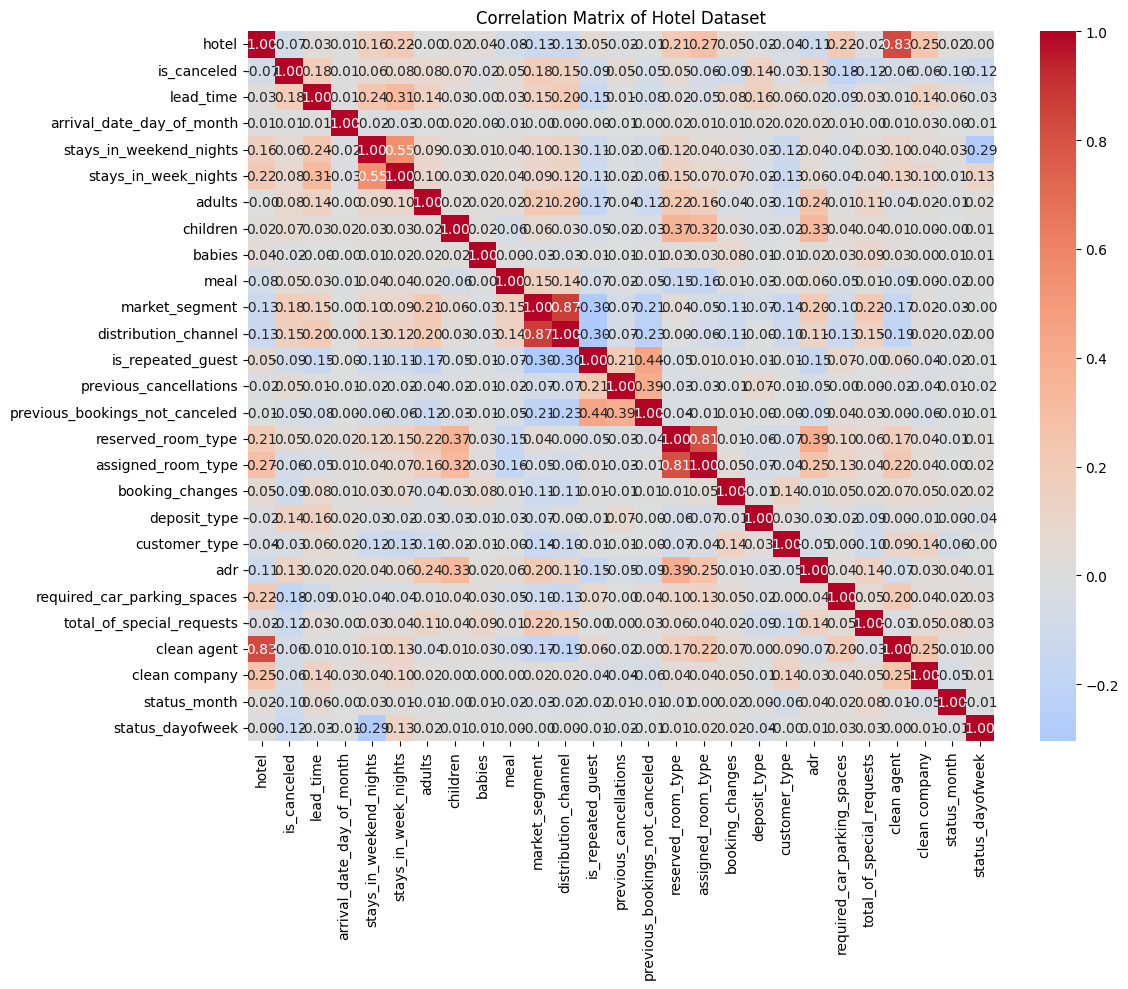

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a larger figure size for better readability
plt.figure(figsize=(12, 10))

# Create heatmap
seaborn.heatmap(correlation_matrix, 
                annot=True,          
                cmap='coolwarm',     
                center=0,            
                fmt='.2f')     

plt.title('Correlation Matrix of Hotel Dataset')
plt.tight_layout()
plt.show()




In [37]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



Accuracy Score of Ada Boost Classifier is : 0.8667787671494631
Confusion Matrix : 
[[18289   535]
 [ 2951  4392]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     18824
           1       0.89      0.60      0.72      7343

    accuracy                           0.87     26167
   macro avg       0.88      0.78      0.81     26167
weighted avg       0.87      0.87      0.86     26167



In [38]:

from tensorflow.keras.utils import to_categorical


y = to_categorical(df['is_canceled'])
X = df.drop(columns=['is_canceled'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

import keras
from keras.models import Sequential
from keras.layers import Dense

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1908/1908 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.7081 - loss: 0.9096 - val_accuracy: 0.7790 - val_loss: 0.5003
Epoch 2/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.7673 - loss: 0.5039 - val_accuracy: 0.7535 - val_loss: 0.5003
Epoch 3/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.7772 - loss: 0.4837 - val_accuracy: 0.7936 - val_loss: 0.4510
Epoch 4/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.7875 - loss: 0.4587 - val_accuracy: 0.7815 - val_loss: 0.4972
Epoch 5/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7915 - loss: 0.4552 - val_accuracy: 0.7957 - val_loss: 0.4428
Epoch 6/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.8008 - loss: 0.4346 - val_accuracy: 0.8032 - val_loss: 0.4301
Epoch 7/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8114 - loss: 0.4196 - val_accuracy: 0.7992 - val_loss: 0.4323
Epoch 8/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8175 - los